In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [38]:
features = pd.read_csv("../data/features.csv")
labels = pd.read_csv("../data/genre.csv")

c:\Users\danie\Uni\UPC\ML\Project\Code\MachineLearningTitanicDisasterProject\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


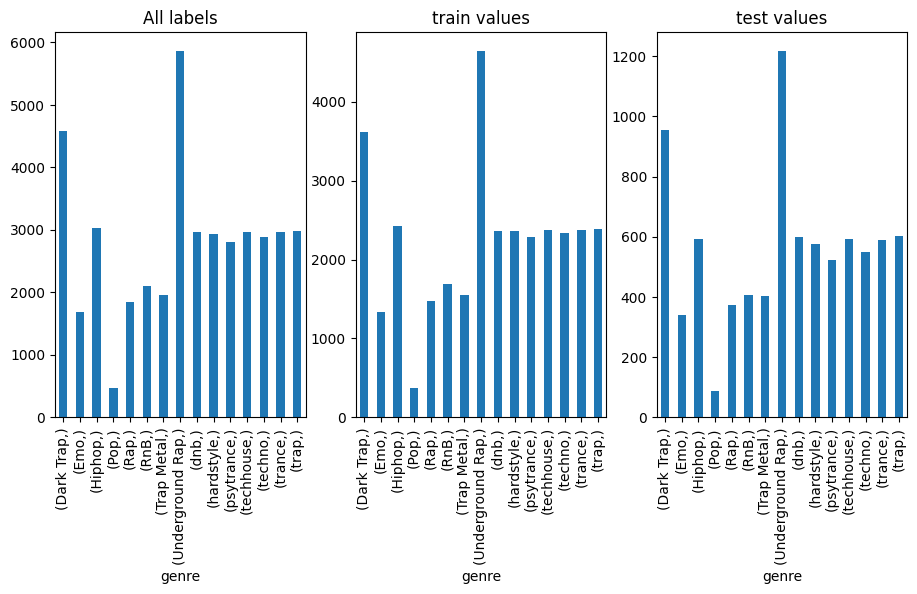

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.8, random_state=1)

fig, axes= plt.subplots(1,3, gridspec_kw={'width_ratios': [1, 1,1]}, figsize=(11,5))
encoder = LabelEncoder().fit(labels)
labels.value_counts(sort=False).plot(kind="bar", ax = axes[0])
axes[0].set_title("All labels")
y_train.value_counts(sort=False).plot(kind="bar", ax = axes[1])
axes[1].set_title("train values")
y_test.value_counts(sort=False).plot(kind="bar", ax = axes[2])
axes[2].set_title("test values")

labels = encoder.transform(labels.to_numpy().ravel())
y_train = encoder.transform(y_train.to_numpy().ravel())
y_test = encoder.transform(y_test.to_numpy().ravel())

In [40]:
param_grid = {
    'n_neighbors': [1,3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_nb_classifier = grid_search.best_estimator_

print(grid_search.best_params_)
# Make predictions on the test set
y_pred = best_nb_classifier.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [41]:
y_pred = best_nb_classifier.predict(X_test)
y_pred = encoder.inverse_transform(y_pred)
y_test = encoder.inverse_transform(y_test)
# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [42]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.5703069236259815
Classification Report:
                 precision    recall  f1-score   support

      Dark Trap       0.39      0.31      0.35       955
            Emo       0.57      0.55      0.56       339
         Hiphop       0.36      0.32      0.33       594
            Pop       0.16      0.08      0.11        88
            Rap       0.32      0.25      0.28       372
            RnB       0.32      0.27      0.30       405
     Trap Metal       0.24      0.15      0.18       402
Underground Rap       0.36      0.44      0.39      1219
            dnb       0.87      0.92      0.89       598
      hardstyle       0.66      0.83      0.74       576
      psytrance       0.79      0.88      0.83       522
      techhouse       0.77      0.86      0.82       594
         techno       0.78      0.85      0.82       550
         trance       0.67      0.66      0.66       590
           trap       0.78      0.76      0.77       602

       accuracy                   

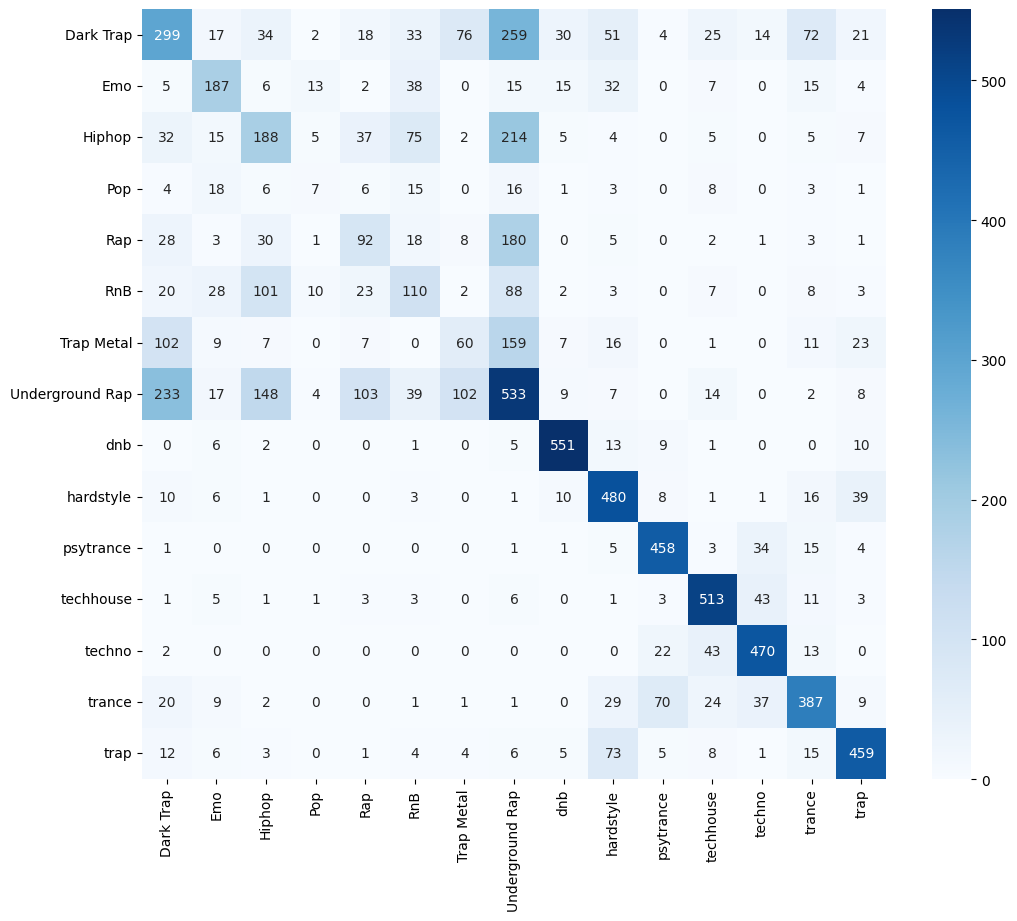

In [43]:
mnb_cm = confusion_matrix(y_test, y_pred)
fig = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(mnb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
